<a href="https://colab.research.google.com/github/Akintoyefelix/ML_pro/blob/main/Time_Series_Ananlysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("yen.csv")

### Japanese currency foreing exchange data
Every Indian rupee has come exchnages values to foreing currency. Which keeps on chaging due to market fluctuations

In [ ]:
df.head(4)

,Date,Yen
0,27-Aug-98,29.6191
1,28-Aug-98,29.8151
2,1-Sep-98,30.5548
3,2-Sep-98,30.8859


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5943 entries, 0 to 5942
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    5943 non-null   object
 1   Yen     5943 non-null   object
dtypes: object(2)
memory usage: 93.0+ KB


In [ ]:
def convert_to_float(str_): #converted the yen values to floats
    if str_ != "-":
        return float(str_)
    else:
        return None

In [ ]:
df["Yen"] = df["Yen"].apply(convert_to_float)

In [ ]:
df["Date"] =pd.to_datetime(df['Date'],format='%d-%b-%y')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5943 entries, 0 to 5942
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5943 non-null   datetime64[ns]
 1   Yen     5942 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 93.0 KB


In [ ]:
df.set_index('Date', inplace=True)

In [ ]:
df.head(4)

,Yen
Date,
1998-08-27,29.6191
1998-08-28,29.8151
1998-09-01,30.5548
1998-09-02,30.8859


<Axes: xlabel='Date'>

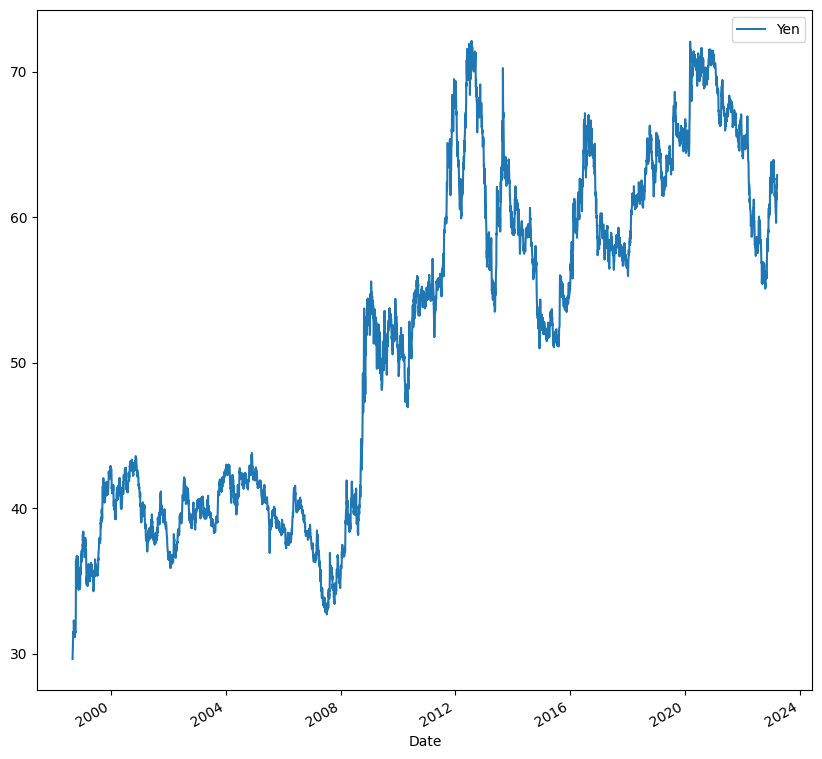

In [ ]:
df.plot()

## Filtering the data for 1-Jan-2022 til 1-Jan-2023

In [ ]:
df_series = df.loc['2022-1-1':'2023-1-1']

<Axes: xlabel='Date'>

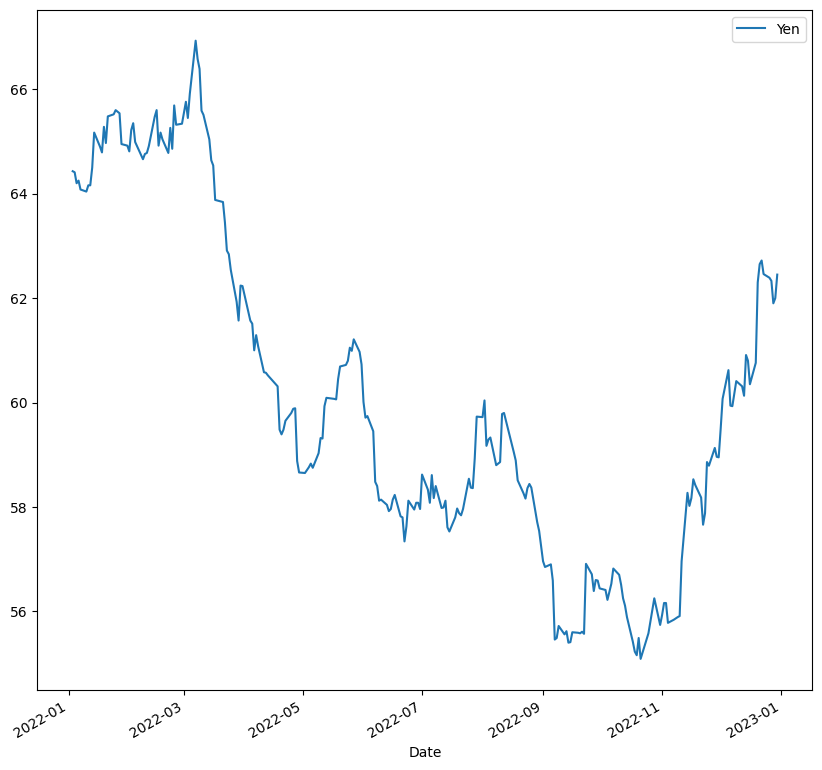

In [ ]:
df_series.plot()

### Decomopsing the time Series

Any time series can be splitted into its components which arise beacuse of cyclic nature

**Additive Time Series Value** = Base value + Trend + Seasonality + Error

In [ ]:
# !pip install statsmodels

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
result_add = seasonal_decompose(df_series['Yen'], model="additive", period = 1)

Text(0.5, 0.98, 'Additive Decompose')

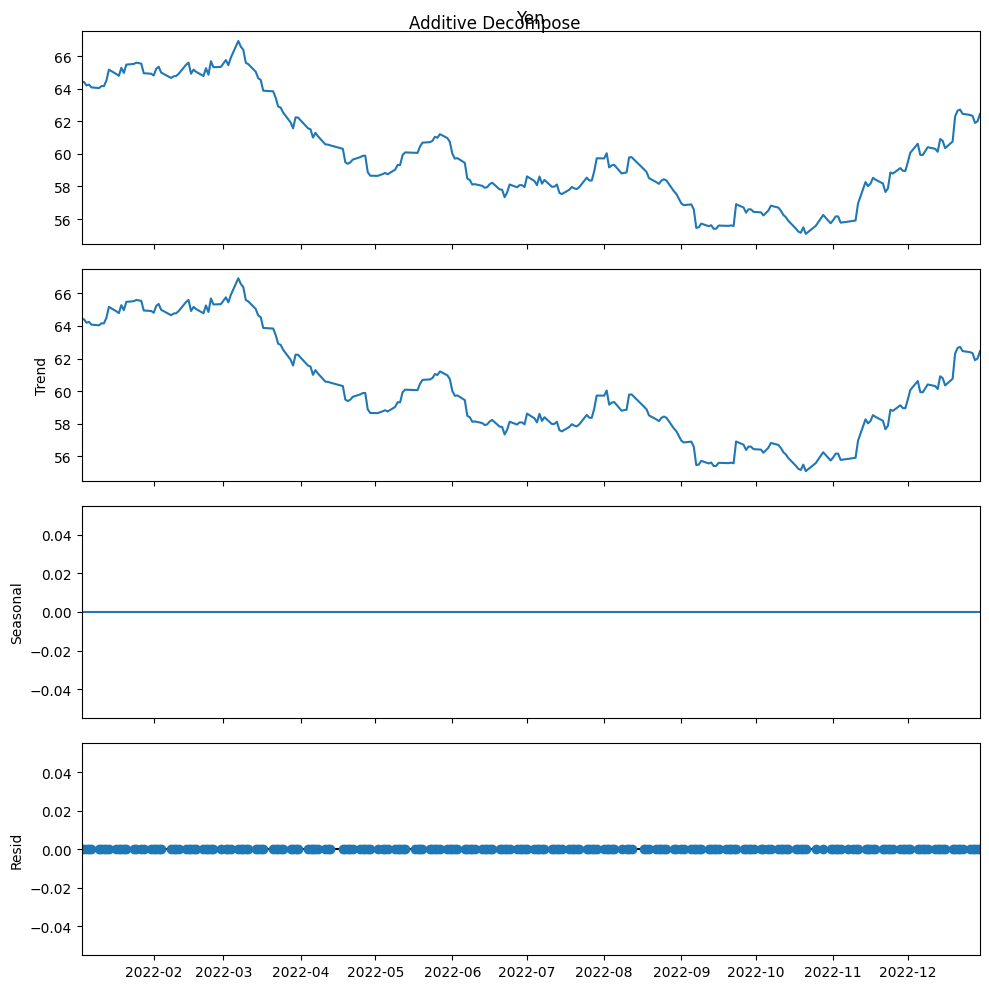

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(10,10)})
result_add.plot().suptitle("Additive Decompose")

From above decompose we analyze that there is no seasonal compoenent in our time series and error term is also constant

# Stationary and Non-Sationary Time Series

Its a property of time series which tells wheter statistical values like mean, varaince, auto-correlation is constant over time or not

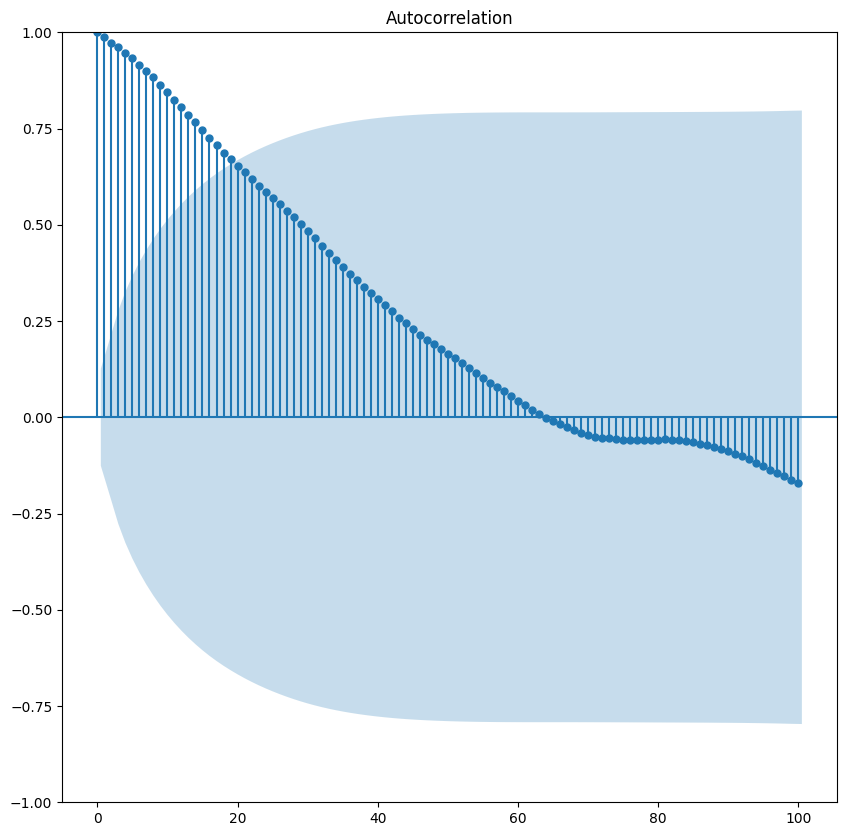

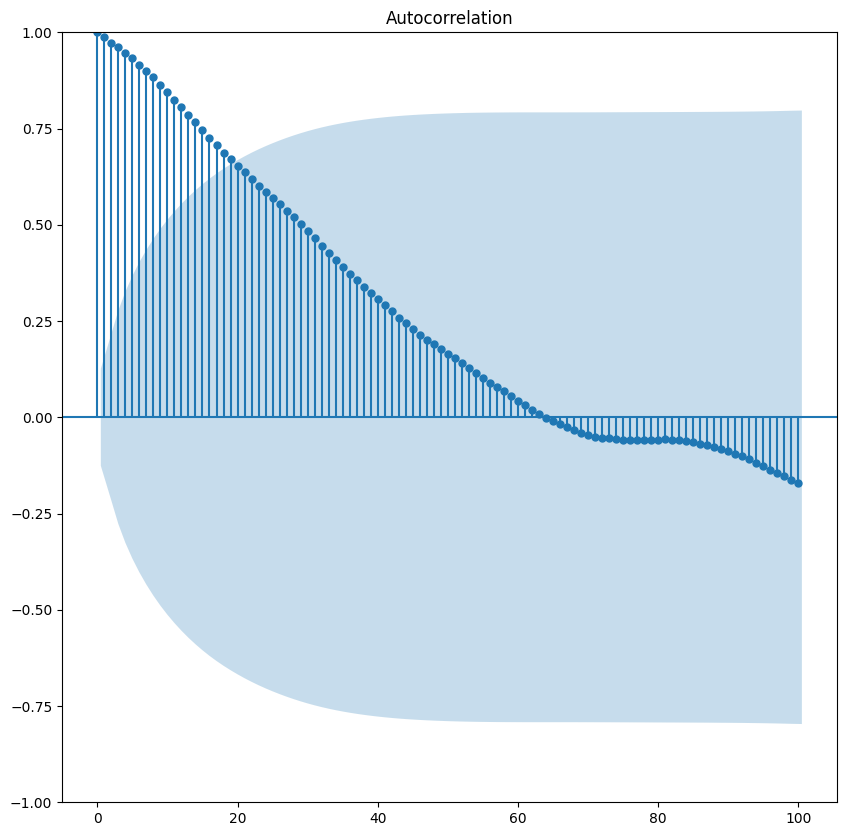

In [ ]:
## auto-correlation plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_series, lags=100)

The above Auto-Correlation suggests that our time series is not stationary, because the auto-correlation is not costant

In [ ]:
fd_ts = df_series.diff()

/Users/Ajay_Kumar_GGN/miniconda3/envs/nd/lib/python3.8/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


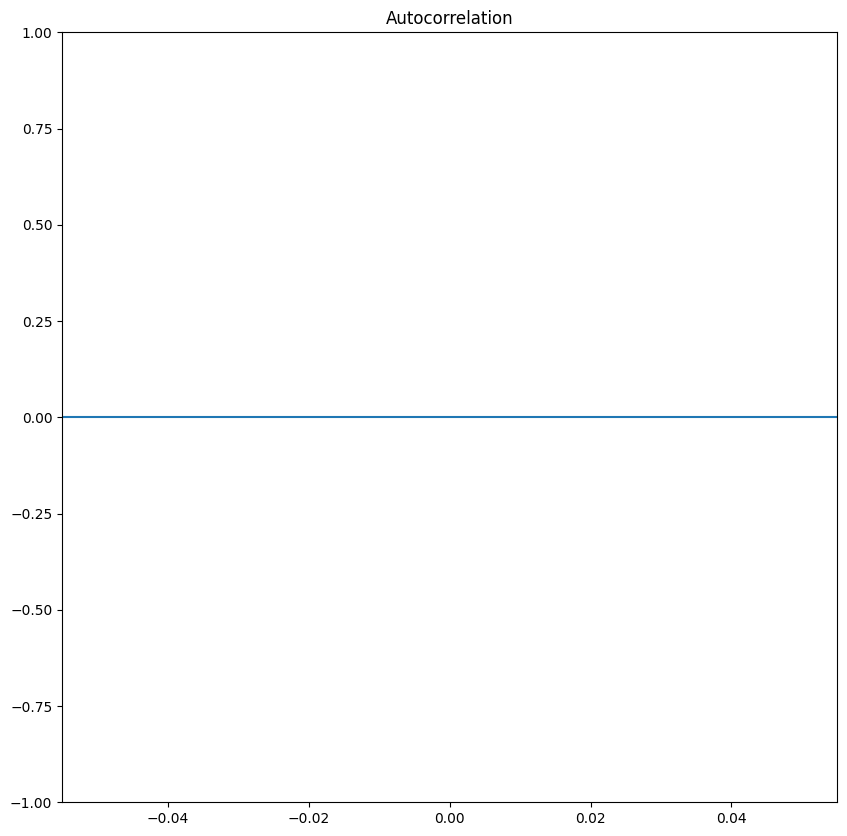

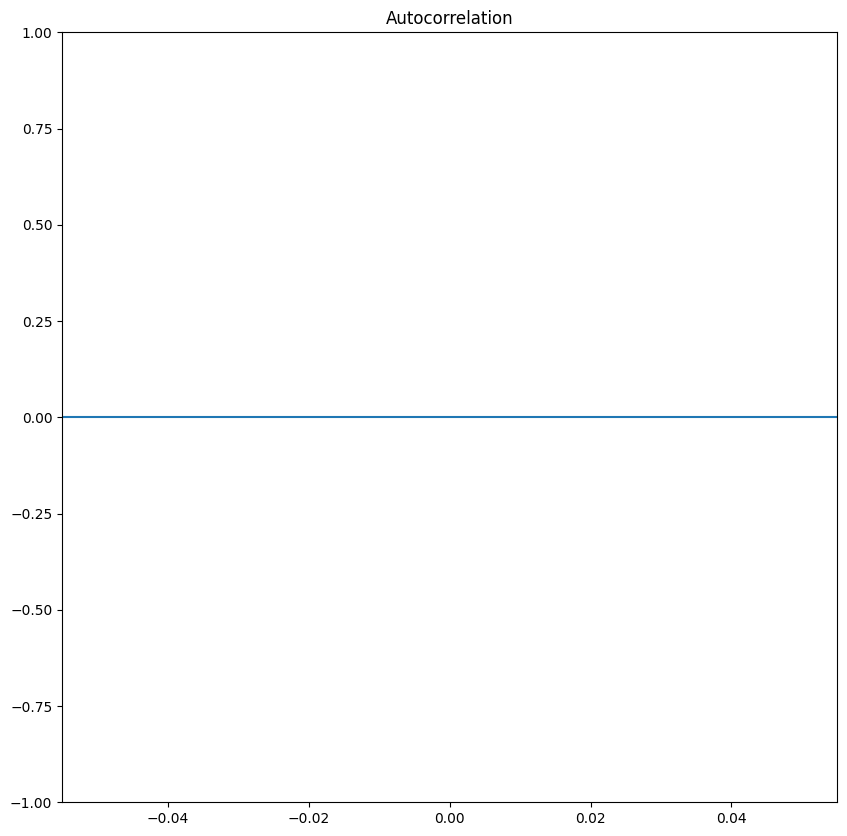

In [ ]:
plot_acf(fd_ts, lags=100)

On obeserving the first difference time series, the auto-correaltion is constant which means our first diffrence time series is stationary

# ARIMA (Auto-Regressive Integrted Moving Average)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(df_series, order =(5,1,1))

/Users/Ajay_Kumar_GGN/miniconda3/envs/nd/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Ajay_Kumar_GGN/miniconda3/envs/nd/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Ajay_Kumar_GGN/miniconda3/envs/nd/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
model_fitted = model.fit()

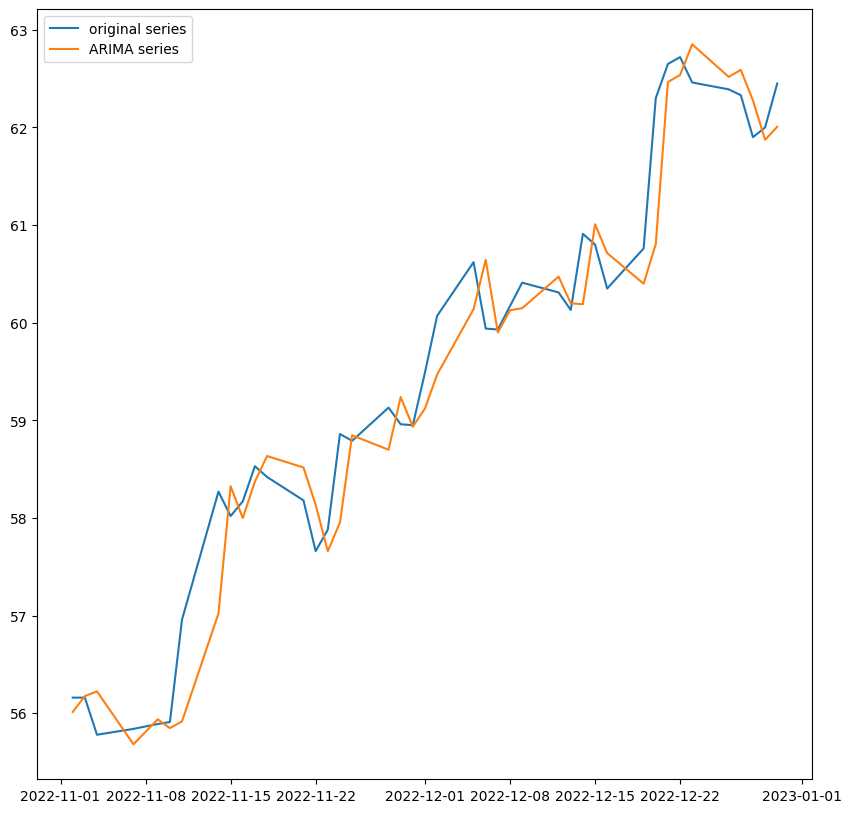

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df_series[200:], label ="original series")
plt.plot(model_fitted.fittedvalues[200:], label ="ARIMA series")
plt.legend()

# Forecast future values

In [ ]:
test_df = df.loc['2023-1-1':'2023-1-10']
test_df

,Yen
Date,
2023-01-02,63.11
2023-01-03,63.78
2023-01-04,63.41
2023-01-05,62.49
2023-01-06,61.63
2023-01-09,62.47
2023-01-10,62.35


In [ ]:
model_fitted.forecast(step=1).to_list()[0]

/Users/Ajay_Kumar_GGN/miniconda3/envs/nd/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


62.4350599499895

In [ ]:
#cyclic Predictions
predicted = []
for i in range(0,7):
    looping_series = df.loc['2022-1-1':f'2023-1-{i+1}']
    model = ARIMA(looping_series, order =(5,1,1))
    model_fit = model.fit()
    predicted.append(model_fit.forecast(step=1).to_list()[0])


/Users/Ajay_Kumar_GGN/miniconda3/envs/nd/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Ajay_Kumar_GGN/miniconda3/envs/nd/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Ajay_Kumar_GGN/miniconda3/envs/nd/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Ajay_Kumar_GGN/miniconda3/envs/nd/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Predicti

In [ ]:
test_df["Forecast"] = predicted

/var/folders/9z/zyy5vhhd3vl4fn3vt90glflr0000gp/T/ipykernel_80111/3111920235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["Forecast"] = predicted


In [ ]:
test_df

,Yen,Forecast
Date,,
2023-01-02,63.11,62.435060
2023-01-03,63.78,63.146877
2023-01-04,63.41,63.802686
2023-01-05,62.49,63.405331
2023-01-06,61.63,62.515937
2023-01-09,62.47,61.598729
2023-01-10,62.35,61.598729


In [ ]:
"this is an apple"

'this is an apple'

In [ ]:
x = "lemon"

In [ ]:
f"this is an {x}"

'this is an lemon'